In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [73]:
# Vehicle classification
# 🚗 Passenger Vehicles
passenger_vehicles = [
    "Sedan Executive (2)", "Sedan Full-Size", "Carryall 4x4", "Carryall 4x4, SWB", 
    "Van Ambulance 4X4 (S", "Van Mid-Size", "Carryall 4x2, SWB", "Carryall 4x4, LWB", 
    "Carryall, 4x4,DD, G", "Carryall, 4x4,deep", "Del Van 4x2, 3/4 T", "Van Ambulance 4x2", 
    "Sedan Security Patr.", "Station Wagon M-Size", "Carryall 4x4 Sec Pat", 
    "Carryall 4x2 Sec Pat", "Sport van 12 Pass.", "Sedan Executive (3)", 
    "Sedan Full Size", "Executive Carryall", "Sedan Mid-Size", "Carryall 4x2, LWB", 
    "Sedan, Executive", "Sedan Executive RYD", "Medical Waste Van", "Carryall 4x4, 5 Pass", 
    "Carryall 4x4, SWB SP"
]

# 🛻 Mini Trucks (Compact Pickups)
mini_trucks = [
    "Pickup 4x2 3/4 Ton", "Pickup 4x4 3/4 Ton", "Pickup 4x2, Mid Size", 
    "Pickup 4x4 1/2 Ton", "Pickup 4x2, 3/4 T", "Tel Inst. 4x2, 3/4 T", 
    "Pickup 4x2, Compact", "Pickup 4x4", "Pickup 4x2, ¾ Ton", "PU 4x2 1/2 T Sec Pat", 
    "PU 4x4 3/4 T Sec Pat", "PU Compact 4x2, CC,D", "Pickup 4x4, ½ Ton", 
    "Pickup 4x4, ¾ Ton", "Pickup 4x2 1/2 Ton"
]

# 🚚 Light-Duty Trucks (1/2 Ton, SUVs)
light_duty_trucks = [
    "Stake 4x2, 1 Ton", "Stake 4x4, 1 Ton", "L/ P M-D Truck 4x2", 
    "Welder's Tr 4x4, 1 T", "Stake Truck 16'", "Util Tr 4x4, 1 T", "Stake Tr 4x4, 1 T", 
    "Welder Tr 4x4, 1 T", "Util C. Cab 4x2, 1 T", "Utility 4x4, 1 Ton", 
    "Utility 4x2, 3/4 Ton", "Utility 4x2, 1/2 Ton", "PU Crewcab 4x4, 1 T", 
    "PU Crewcab 4x2, 1 T", "Step Van 4x2 1 Ton", 
    "Stake Tr 4x4, 1.5 T", "C Cab Crane Tr 4x2", "Ch Cab 167 W/B", "Ch Cab 189 W/B", 
    "Stake Truck 16# 4x4", "Telescopic Crane Tru", "TL053 - PU Crew Cab"
]

# 🚛 Medium-Duty Trucks (3/4 Ton, 1 Ton, Utility Vehicles)
medium_duty_trucks = [
    "Svcs Tanker 1500 G", "Dump Tr, 4Cu. Yards", "Water Tanker, 2000 G", 
    "St Tr 16' Hyd. Tail.", "Stake Tr 16' Hyd. Tail.", "St Tr 14' Hyd. Crane (industrial)", 
    "Svcs T, 4x2, 1500 G", "Fiber Optic Repair V", "Utility CC 4x4, 1 T", 
    "Carryall, 4x4, DD,D", "CARRYALL, 4X4 DD HD,", "St Tr 16' Hyd. Tail. (medium)", 
    "St Tr 14' Hyd. Crane (utility)"
]

# 🚛 Heavy-Duty Trucks (Stake Trucks, Dump Trucks, Tankers)
heavy_duty_trucks = [
    "St Tr 14' Hyd. Crane", "St Tr 16' Hyd. Tail.", 
    "Hoist Trk C/Cab, 1 T", "St Tr 14' Hyd C 4x4", "St Truck 4x4, 1 T"
]

# 🚌 Buses
buses = [
    "Bus, 25 Passengers"
]

total_len = len(passenger_vehicles) + len(mini_trucks) + len(light_duty_trucks) + len(medium_duty_trucks) + len(heavy_duty_trucks) + len(buses)
print("The total number of vehicle models is: ", len(passenger_vehicles), len(mini_trucks), len(light_duty_trucks),\
       len(medium_duty_trucks), len(heavy_duty_trucks), len(buses), total_len)

# prompt to classify vehicle types: 
# classify all vehicle models in the column "Activity Type Description" of the spreadsheet into the following types: passenger vehicles, mini-trucks, light duty trucks, medium duty trucks, heavy duty trucks, and buses, and list the vehicle model names within each type in each individual array. 
# please be noted there are a total of 89 vehicle models in the column "Activity Type Description", be sure classify all vehicles models and do not miss each one of them

The total number of vehicle models is:  27 15 22 13 5 1 83


In [74]:
df = pd.read_excel('../Aramco Leased Vehicles - from 2012 up-to-date.xlsx')
df = df[df['Pri. Stat.'] == 'Retired']
df = df.drop(columns=['Vehicle Door No', 'Data Collected on'])
df['service_year'] = df['service_year'].fillna(0).astype(int)

# Define function to categorize vehicle types
def classify_vehicle(model):
    if model in passenger_vehicles:
        return "Passenger Vehicle"
    elif model in mini_trucks:
        return "mini_trucks"
    elif model in light_duty_trucks:
        return "light_duty_trucks"
    elif model in medium_duty_trucks:
        return "medium_duty_trucks"
    elif model in heavy_duty_trucks:
        return "heavy_duty_trucks"
    elif model in buses:
        return "buses"
    else:
        return "Others"

# Apply the function to create the new column
df["vehicle_type"] = df["Activity Type Description"].apply(classify_vehicle)

df.head()

,Pri. Stat.,IMEI Unit,Make,Model,Model Year,Activity Type,Activity Type Description,Actual Retired Date,Fuel Type,service_year,vehicle_type
0,Retired,NaN,NaN,NaN,2008,TLPB2,Carryall 4x4,03/31/2013,Gasoline,5,Passenger Vehicle
1,Retired,NaN,NaN,NaN,2008,TLPB2,Carryall 4x4,03/31/2013,Gasoline,5,Passenger Vehicle
2,Retired,NaN,NaN,NaN,2008,TLPB2,Carryall 4x4,03/31/2013,Gasoline,5,Passenger Vehicle
3,Retired,NaN,NaN,NaN,2008,TLPB2,Carryall 4x4,03/31/2013,Gasoline,5,Passenger Vehicle
4,Retired,NaN,NaN,NaN,2008,TLPB2,Carryall 4x4,03/31/2013,Gasoline,5,Passenger Vehicle


In [78]:
# Calculate survival rate for each vehicle type
vehicle_types = ['Passenger Vehicle', 'mini_trucks', 'light_duty_trucks', 'medium_duty_trucks', 'heavy_duty_trucks', 'buses']
survival_rate = {}

for veh_type in vehicle_types:
    num_vehicles = len(df[df['vehicle_type'] == veh_type])
    survival_rate[veh_type] = []
    
    # if veh_type == 'heavy_duty_trucks':
    #     continue
        
    num_retired = 0
    vehicle_age = range(int(df.loc[df['vehicle_type'] == veh_type, 'service_year'].max()) + 1)
    for age in vehicle_age:
        num_retired += len(df[(df['vehicle_type'] == veh_type) & (df['service_year'] == age)])
        try:
            survival_rate[veh_type].append((num_vehicles - num_retired)/num_vehicles)
        except ZeroDivisionError:
            survival_rate[veh_type].append(0) 
            print(f"❌ Failed to fetch website: {veh_type} at age {age}")

survival_rate_df = pd.DataFrame.from_dict(survival_rate, orient='index').fillna(0)
survival_rate_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Passenger Vehicle,0.998506,0.995791,0.984521,0.959674,0.836796,0.703598,0.557773,0.381806,0.219823,0.034487,0.021996,0.000815,0.000136,0.0
mini_trucks,1.000000,0.997648,0.992943,0.988238,0.944484,0.804752,0.557516,0.513291,0.380381,0.352152,0.138085,0.003999,0.000000,0.0
light_duty_trucks,1.000000,0.994664,0.992529,0.926361,0.866596,0.708645,0.604055,0.529349,0.341515,0.184632,0.165422,0.034152,0.000000,0.0
medium_duty_trucks,1.000000,1.000000,1.000000,0.987952,0.855422,0.590361,0.361446,0.265060,0.216867,0.180723,0.096386,0.036145,0.000000,0.0
heavy_duty_trucks,1.000000,1.000000,1.000000,0.972222,0.972222,0.916667,0.777778,0.777778,0.722222,0.694444,0.083333,0.000000,0.000000,0.0


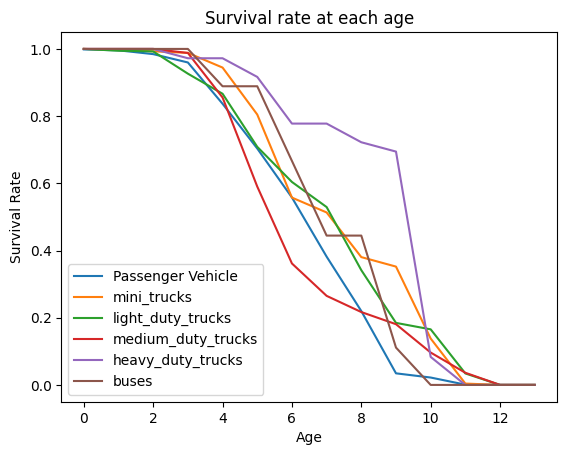

In [79]:
# Results visualization

for index, row in survival_rate_df.iterrows():
    plt.plot(row, label=index)

plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival rate at each age')
plt.legend()
plt.show()

In [59]:
# Calculate survival rate for each activity type within a vehicle type
df_passenger = df[df['vehicle_type'] == 'Passenger Vehicle']
activity_types = df_passenger['Activity Type Description'].unique()
survival_rate_passenger = {}

for activity in activity_types:
    num_vehicles = len(df_passenger[df_passenger['Activity Type Description'] == activity])
    survival_rate_passenger[activity] = []
    num_retired_passenger = 0
    vehicle_age_passenger = range(int(df_passenger.loc[df_passenger['Activity Type Description'] == activity, 'service_year'].max()) + 1)

    for age in vehicle_age_passenger:
        num_retired_passenger += len(df_passenger[(df_passenger['Activity Type Description'] == activity) & (df_passenger['service_year'] == age)])
        try:
            survival_rate_passenger[activity].append((num_vehicles - num_retired_passenger)/num_vehicles)
        except ZeroDivisionError:
            survival_rate_passenger[activity].append(0) 
            print(f"❌ Failed to fetch website: {activity} at age {age}")

survival_rate_passenger_df = pd.DataFrame.from_dict(survival_rate_passenger, orient='index').fillna(0)
survival_rate_passenger_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Carryall 4x4,1.000000,1.000000,0.990099,0.990099,0.871287,0.772277,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Sedan Executive (2),1.000000,1.000000,0.923077,0.884615,0.769231,0.653846,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
"Carryall 4x4, SWB",0.999403,0.997017,0.988067,0.981504,0.965990,0.884845,0.815036,0.718974,0.418258,0.041766,0.030430,0.0,0.0,0.0
Sedan Full-Size,0.998791,0.996857,0.987186,0.957447,0.801257,0.653772,0.490087,0.250000,0.114362,0.000484,0.000242,0.0,0.0,0.0
Van Ambulance 4X4 (S,1.000000,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


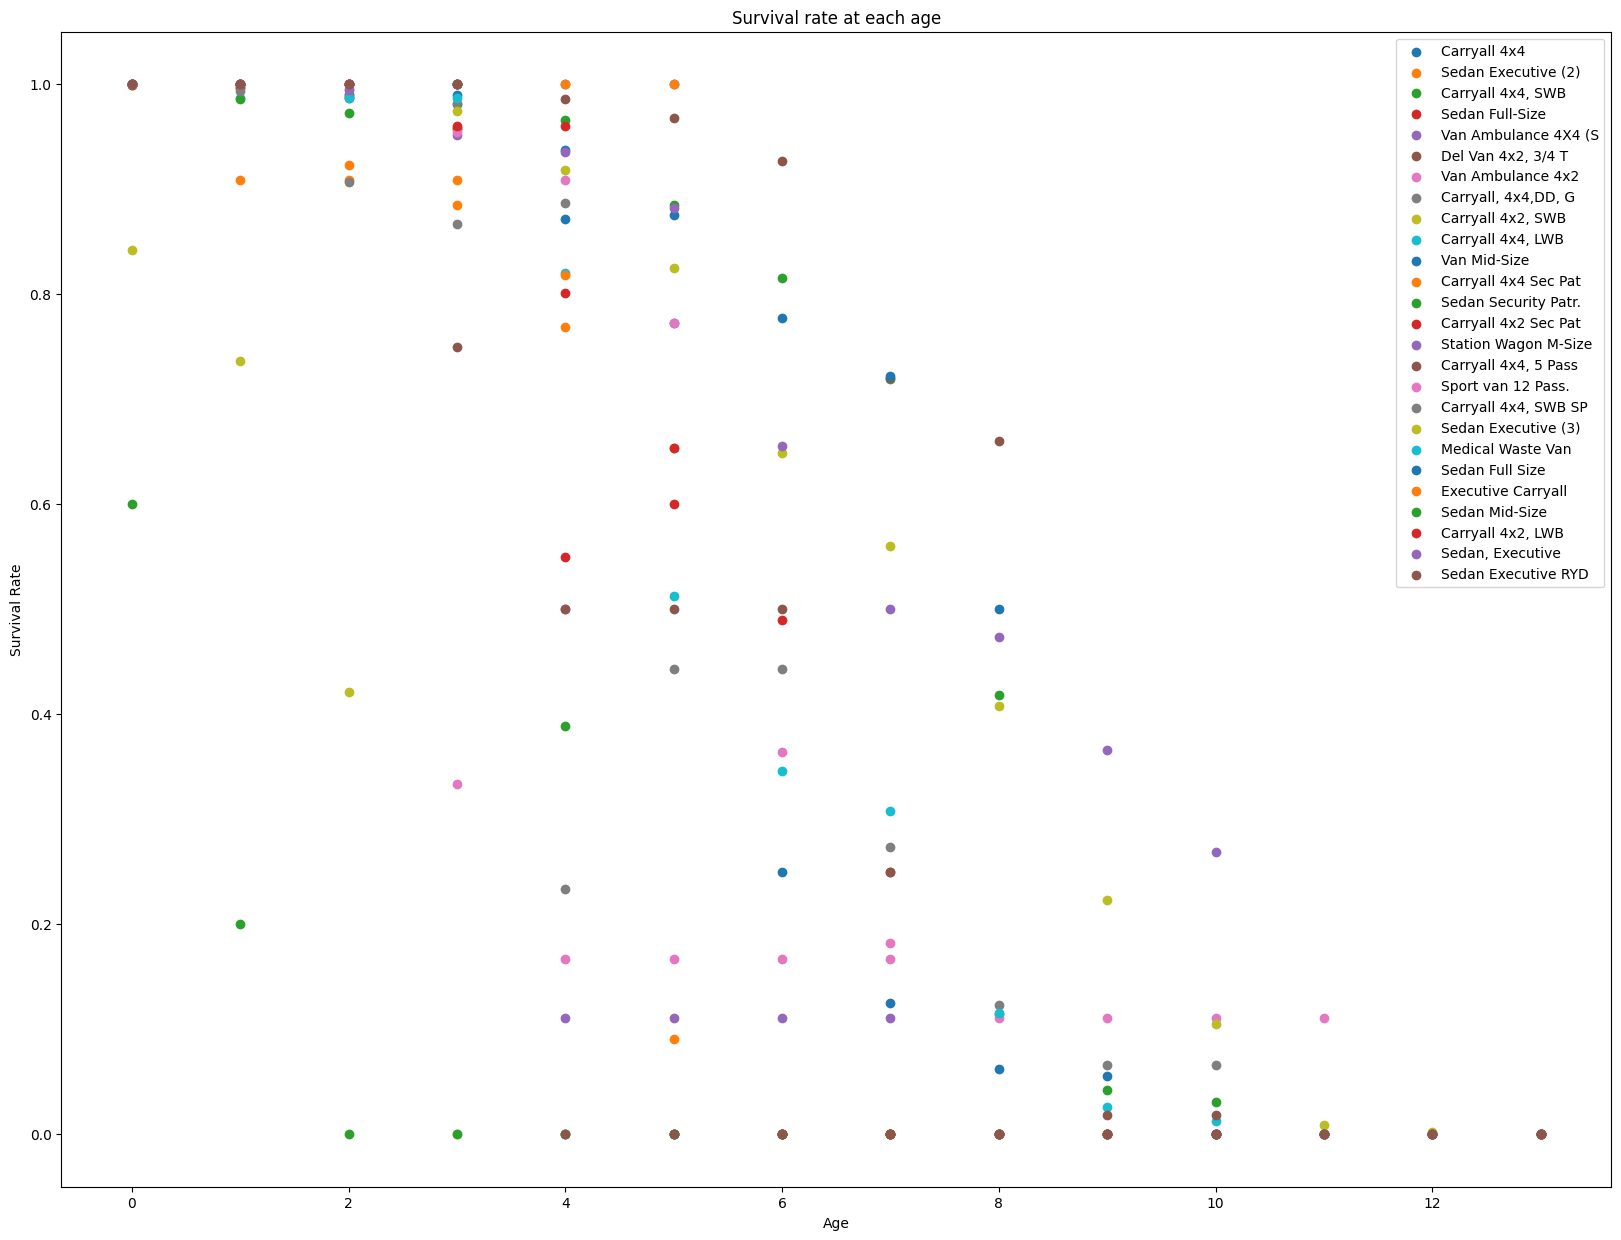

In [65]:
# Visualize sub-type results
def scatter_plot(df):
    for index, row in df.iterrows():
        x_values = range(len(row))
        y_values = row.values
        plt.scatter(x_values, y_values, label=index)

    plt.xlabel('Age')
    plt.ylabel('Survival Rate')
    plt.title('Survival rate at each age')
    plt.legend()
    plt.show()


fig = plt.figure(figsize=(20, 15))
scatter_plot(survival_rate_passenger_df)